<a href="https://colab.research.google.com/github/cutiips/A-new-hope/blob/main/No11_LudovicMarquis_JonathanCurty_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer les librairies

In [1]:
# pour colab
!pip install -r https://raw.githubusercontent.com/cutiips/A-new-hope/main/requirements.txt > /dev/null 2>&1
!pip install scipy
# en local
# !pip install -r requirements.txt

In [2]:
!pip install --upgrade numpy scipy

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importer les donn√©es

In [4]:
# en local
# data = pd.read_csv("Data/titanic.csv")
data = pd.read_csv("https://raw.githubusercontent.com/cutiips/A-new-hope/main/Data/titanic.csv") # en ligne (colab)
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Questions

## 1. Pr√©paration des donn√©es

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Cr√©er une variable `FamilySize` qui est correspond √† `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [5]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:

    """La fonction pr√©pare les donn√©es √† l'analyse.

    Args:
        data (pd.DataFrame): La dataframe originale

    Returns:
        pd.DataFrame: La dataframe preprocess√© et pr√™te √† √™tre analys√©e.
    """

    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()

    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed = data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed = data_preprocessed.dropna()

    # Cr√©er une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed = data_preprocessed.drop(columns=["SibSp", "Parch"])

    # Recalculer le prix du billet
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True)


    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas √©t√© retir√©."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN √† supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas √©t√© cr√©√©e."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas √©t√© recalcul√©e."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas √©t√© encod√©."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas √©t√© encod√©."

    return data_preprocessed

Le r√©sultat de la function doit vous donner exactement le tableau ci-dessous.

In [6]:
# Preprocess les donn√©es √† l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

Survived  Pclass   Age       Fare  FamilySize  Sex_male  Embarked_Q  \
0           0       3  22.0   3.625000           2      True       False   
1           1       1  38.0  35.641650           2     False       False   
2           1       3  26.0   7.925000           1     False       False   
3           1       1  35.0  26.550000           2     False       False   
4           0       3  35.0   8.050000           1      True       False   
..        ...     ...   ...        ...         ...       ...         ...   
885         0       3  39.0   4.854167           6     False        True   
886         0       2  27.0  13.000000           1      True       False   
887         1       1  19.0  30.000000           1     False       False   
889         1       1  26.0  30.000000           1      True       False   
890         0       3  32.0   7.750000           1      True        True   

     Embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
885       False  
886        True  
887        True  
889       False  
890       False  

[712 rows x 8 columns]

## 2. Inf√©rence statistique (4 pts)

**Q1: L'√¢ge moyen des passagers du Titanic est-il le m√™me que l'√¢ge moyen de la population en 1912 (28 ans)?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***

La variable d'int√©r√™t est l'√¢ge des passagers du titanic. C'est une variable de type quantitative continue √©tant donn√© qu'elle mesure le temps √©coul√© depuis la naissance et peut √™tre not√© √† n'importe quelle pr√©cision (jours, mois, ann√©es par exemple). Ses valeur admissibles ne sont pas d√©nombrables car il en existe une infinit√©.

***2. R√©aliser une visualisation appropri√©e selon les variables***

Les visualisation appropri√©es pour repr√©senter cette variable sont l'histogramme et le boxplot. Ils permettent de visualiser la distribution des valeurs.

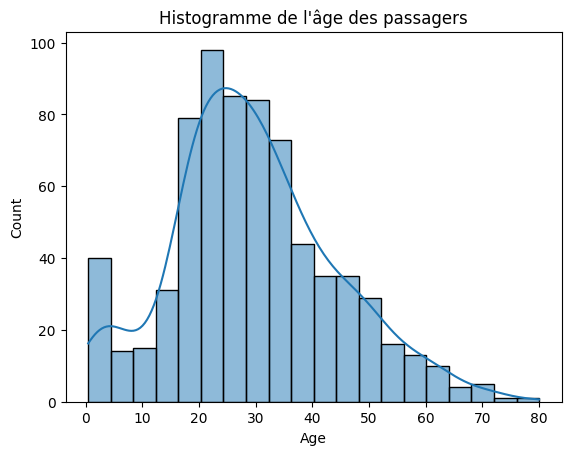

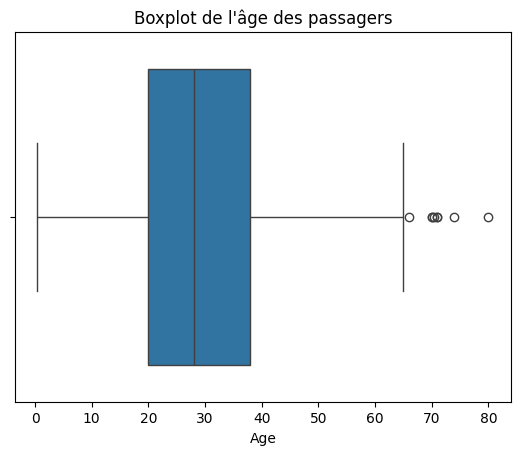

In [7]:
sns.histplot(
    data=data_clean,
    x="Age",
    kde=True
)
plt.title("Histogramme de l'√¢ge des passagers")
plt.show()

sns.boxplot(
    data=data_clean,
    x="Age"
)
plt.title("Boxplot de l'√¢ge des passagers")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***

- **H0 :** l'√¢ge moyen des passagers du titanic est √©gal √† l'√¢ge moyen de la population en 1912 (Œº = 28).

- **H1 :** l'√¢ge moyen des passagers du titanic n'est pas √©gal √† l'√¢ge moyen de la population en 1912 (Œº ‚â† 28).

***4. Identifier le test statistique appropri√©***
  
Le test appropri√© est le `t-test` de Student car on proc√®de √† une comparaison entre la moyenne d'un √©chantillon (les passagers du titanic) √† une valeur (la moyenne de la population en 1912), soit 28 ans.

Il est suppos√© que les donn√©es suivent la loi normale. Il est √©galement justifi√© d'utiliser un `t-test` √©tant donn√© que l'√©chantillon est suffisamment grand (> 30).

***5. V√©rifier la validation des postulats du t-test***

L'√©chantillon n'est pas r√©ellement al√©atoire car il correspond √† une population sp√©cifique, s√©lectionn√©e selon certains crit√®res qu'il soit sociaux, √©conomique ou historique. Ceci limite la g√©n√©ralisation des r√©sultats √† l'ensemble de la population de 1912.

Avec un √©chantillon de 712 passagers (> 30), nous pouvons postuler que, malgr√© une distribution pas optimale (voir histogramme), la validation des postulats du `t-test` peut tout de m√™me √™tre valid√©.

In [8]:
n = len(data_clean)

print("La taille de l'√©chantillon est de : " + str(n))

La taille de l'√©chantillon est de : 712


***6. Calculer la statistique t et la p-valeur***

- Statistiques `t` = `3,02`
- `p-valeur` = `0.0026`

Selon les r√©sultats de l'analyse, nous remarquons que la diff√©rence entre la moyenne observ√©e et la moyenne hypoth√©tique est grande.

Le r√©sultat de la p-valeur signifie qu'il existe `0,26 %` de probabilit√© d'observer une si grande diff√©rence entre la moyenne de l'√©chantillon et 28 ans, si l'hypoth√®se nulle (`H0`) est vraie.

In [9]:
ages = np.array(data_clean["Age"])

t, p_valeur = stats.ttest_1samp(ages, popmean=28)

print("La statistique t est de : " + str(t))
print("La p-valeur associ√©e est de : " + str(p_valeur))

La statistique t est de : 3.0233009800374053
La p-valeur associ√©e est de : 0.002590259537786662


***7. Prendre une d√©cision selon la p-valeur (alpha 5%)***

La `p-valeur` √©tant `< 0,05`, le r√©sultat du `t-test` est consid√©r√© comme statistiquement significatif au seuil alpha 5%.

Ainsi, cela nous permet de rejetter l'hypoth√®se nulle.

In [10]:
alpha = 0.05

if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypoth√®se nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypoth√®se nulle.")

Avec un seuil alpha 0.05 on rejette l'hypoth√®se nulle.


***8. Interpr√©ter le r√©sultat et √©valuer la taille de l‚Äôeffet***  
  
Les r√©sultats nous montrent que l'√¢ge moyen des passagers du titanic (29,64 ans) n'est pas √©gal √† l'√¢ge moyen de la population en 1912. Ces r√©sultats sont statistiquement significatifs.

Toutefois, le test de Cohen (0,11) indique que l'ampleur de la diff√©rence est tr√®s faible sur le plan pratique.

Ainsi, bien qu'il y ait une diff√©rence son effet est faible.

In [11]:
moyenne_ages = np.mean(ages)
ecart_type_ages = np.std(ages, ddof=1)
d_cohen = (moyenne_ages - 28) / ecart_type_ages

print("La moyenne des √¢ges est de : " + str(moyenne_ages))
print("L'√©cart-type des √¢ges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des √¢ges est de : 29.64209269662921
L'√©cart-type des √¢ges est de : 14.49293290032352
Le d de Cohen est de : 0.11330299449551398


**Q2: La survie d√©pend-elle de la classe du passager?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***

Les variables d'int√©r√™ts sont : les chances de survie des passagers (Survived) et la classe dans laquelle ils voyageaient (Pclass).

La premi√®re (Survived) est une variable de type qualitative nominale car elle est binaire et exprime une cat√©gorie (mort ou survivant). La seconde (Pclass) est une variable **qualitative ordinale** car elle d√©crit une cat√©gorie o√π il y a un ordre hi√©rarchique logique (1√®re > 2√®me > 3√®me (prix, confort, prestige)).

***2. R√©aliser une visualisation appropri√©e selon les variables***

La visualisation apropri√©e pour r√©pondre √† la question est le diagramme en barre group√©es. Il permet de comparer les proportions de survivants et non survivants au sein de chaque classe.

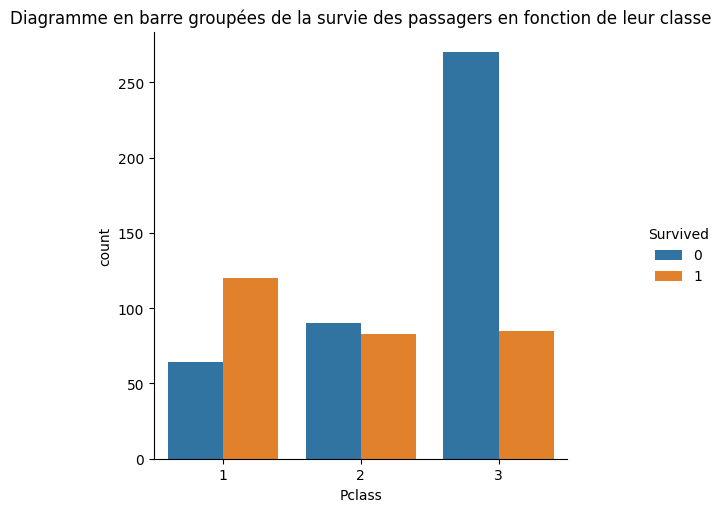

In [12]:
sns.catplot(
    data=data_clean,
    x="Pclass",
    hue="Survived",
    kind="count"
)
plt.title("Diagramme en barre group√©es de la survie des passagers en fonction de leur classe")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***
- **H0 :** la survie du passager est ind√©pendante de sa classe  
- **H1 :** la survie du passager n'est pas ind√©pendante de sa classe

***4. Identifier le test statistique appropri√©***

Le test statistique appropri√© pour tester la relation entre deux variables **qualitatives** est le test du Chi-2 (`ùúí^2`).

***5. V√©rifier la validation des postulats du test de ùúí^2 d‚Äôind√©pendance***

L'application du Chi-2 (`ùúí^2`) est pertinente car les observations sont ind√©pendantes. De plus, les effectifs attendus dans chaque case du tableau de contigence sont suffisamment grands (`>= 5`).

In [13]:
tab_contingence = pd.crosstab(data_clean["Survived"], data_clean["Pclass"])

print(tab_contingence)


Pclass      1   2    3
Survived              
0          64  90  270
1         120  83   85


***6. Calculer la statistique et la p-valeur***

- Chi-2 = `91,08`
- `p-valeur` = `1,67e-20`

Selon les r√©sultats de l'analyse, nous remarquons que la diff√©rence entre les effectifs observ√©s et les effectifs attendus, si les deux variables √©taient ind√©pendantes, et tr√®s grandes.

Le r√©sultat de la `p-valeur` est tr√®s faible. La probabilit√© d'observer une telle d√©pendance au sein d'un √©chantillon al√©atoire est donc tr√®s petite, si on assume que l'hypoth√®se nulle (H0) est vraie.

In [14]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(tab_contingence)

print("Chi-2 : " + str(chi2_stat))
print("La p-valeur est de : " + str(p_val))
print("Le degr√© de libert√© est de : " + str(dof))
print("Les valeurs attendues sont : " + str(ex))

Chi-2 : 91.08074548791019
La p-valeur est de : 1.6675060315554636e-20
Le degr√© de libert√© est de : 2
Les valeurs attendues sont : [[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]]


***7. Prendre une d√©cision selon la p-valeur (alpha 5%)***

La p-valeur √©tant tr√®s largement inf√©rieure au seuil de 5%, le r√©sultat du Chi-2 est consid√©r√© comme statistiquement significatif. Ainsi, cela nous permet de rejeter l'hypoth√®se nulle (H0).

In [15]:
if p_val < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypoth√®se nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypoth√®se nulle.")

Avec un seuil alpha 0.05 on rejette l'hypoth√®se nulle.


***8. Interpr√©ter le r√©sultat et √©valuer la taille de l‚Äôeffet***  

Les r√©sultats nous montrent qu'il existe une d√©pendance statistiquement significative entre la classe du passager et sa survie (voir diagramme en barre group√©es).

Le V de Cramer √©tant de 0,36, cela indique (selon l'√©tude de Amyotte, 2017) que l'intensit√© du lien entre les deux variables est tr√®s forte.

Ainsi, la classe dans laquelle le passager voyageait a eu un impact significatif et fort sur ses chances de survie.


Source : Amyotte (2017) - https://www.studocu.com/fr-ca/document/universite-de-montreal/introduction-aux-statistiques/aide-memoire-du-livre-stt1901/48217596

In [16]:
v_cramer = np.sqrt(chi2_stat / (len(data_clean) * (min(tab_contingence.shape) - 1)))

print("Le V de Cramer est de : " + str(v_cramer))

Le V de Cramer est de : 0.35766240415815087


**Q3: Existe-t-il une diff√©rence d'√¢ge entre les passagers qui ont surv√©cu et les passagers d√©c√©d√©s?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***

Les variables d'int√©r√™ts sont l'√¢ge (`Age`) et les chances de survie des passagers (`Survived`). Comme expliqu√© pr√©c√©demment, l'√¢ge est une variable **quantitative continue** et les chances de survie sont une variable de type **qualitative nominale**.


***2. R√©aliser une visualisation appropri√©e selon les variables***

La visualisation appropri√©e pour r√©pondre √† la question est le boxplot des √¢ges selon la variable `Survived` car il permet de comparer visuellement la distribution des √¢ges dans chacun des groupes.  

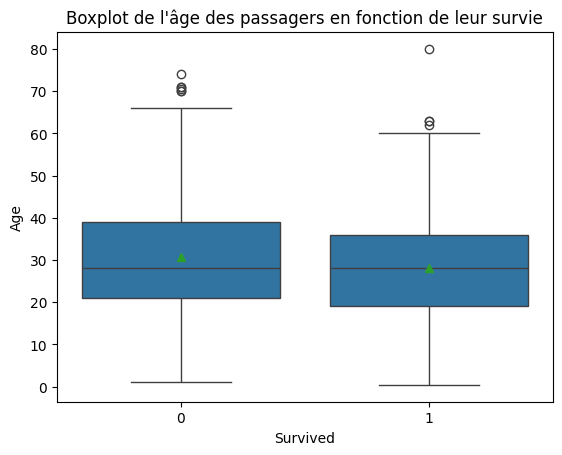

In [17]:
sns.boxplot(
    data=data_clean,
    x="Survived",
    y="Age",
    showmeans=True
)
plt.title("Boxplot de l'√¢ge des passagers en fonction de leur survie")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***

- **H0 :** il n'existe pas de diff√©rence d'√¢ges entre les passagers survivants et les passagers d√©c√©d√©s.
- **H1 :** il existe une diff√©rence d'√¢ges entre les passagers survivants et les passagers d√©c√©d√©s.

***4. Identifier le test statistique appropri√©***
  
Le test appropri√© est le `t-test` de Student car il permet de comparer les moyennes d'√¢ges des deux groupe qui sont ind√©pendants.

Il est √©galement justifi√© d'utiliser un `t-test` √©tant donn√© que la taille des deux groupes est suffisamment grande (> 30).

***5. V√©rifier la validation des postulats du t-test √† deux √©chantillons***

L'√©chantillon n'est pas r√©ellement al√©atoire car il correspond √† une population sp√©cifique, s√©lectionn√©e selon certains crit√®res qu'il soit sociaux, √©conomique ou historique. Ceci limite la g√©n√©ralisation des r√©sultats √† l'ensemble de la population de 1912.

La taille de l'√©chantillon des passagers n'ayant pas surv√©cu est de `424` alors que la taille de l'√©chantillon des passagers ayant surv√©cu est de `288`. Ainsi, chacun des √©chantillons est `> 30`.

In [18]:
n_not_survived = len(data_clean[data_clean["Survived"] == 0])
n_survived = len(data_clean[data_clean["Survived"] == 1])

print("La taille de l'√©chantillon des passagers n'ayant pas surv√©cu est de : " + str(n_not_survived))
print("La taille de l'√©chantillon des passagers ayant surv√©cu est de : " + str(n_survived))

La taille de l'√©chantillon des passagers n'ayant pas surv√©cu est de : 424
La taille de l'√©chantillon des passagers ayant surv√©cu est de : 288


***6. Calculer la statistique et la p-valeur***

- Statistiques `t` = `2,18`
- `p-valeur` = `0.03`

Selon les r√©sultats de l'analyse, nous remarquons qu'il existe une diff√©rence entre l'√¢ge moyen des passagers survivants et des passagers d√©c√©d√©s.

Le r√©sultat de la p-valeur signifie que il y a environ 2,93% de probabilit√©s d'observer une diff√©rence d'√¢ge aussi marqu√©e, entre survivants et non-survivants, par hasard si l'hypoth√®se nulle √©tait vraie.

In [19]:
ages_not_survived = np.array(data_clean[data_clean["Survived"] == 0]["Age"])
ages_survived = np.array(data_clean[data_clean["Survived"] == 1]["Age"])

t, p_valeur = stats.ttest_ind(
    ages_not_survived,
    ages_survived,
    alternative="two-sided",
    equal_var=False
)

print("La statistique t est de : " + str(t))
print("La p-valeur associ√©e est de : " + str(p_valeur))

La statistique t est de : 2.184486214939826
La p-valeur associ√©e est de : 0.02931497754601072


***7. Prendre une d√©cision selon la p-valeur (alpha 5%)***

La `p-valeur` √©tant `< 0,05`, le r√©sultat du `t-test` est consid√©r√© comme statistiquement significatif au seuil alpha 5%.

Ainsi, cela nous permet de rejetter l'hypoth√®se nulle, ce qui confirme qu'il y a une diff√©rence d'√¢ge entre les deux √©chantillons.

In [20]:
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypoth√®se nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypoth√®se nulle.")

Avec un seuil alpha 0.05 on rejette l'hypoth√®se nulle.


***8. Interpr√©ter le r√©sultat et √©valuer la taille de l‚Äôeffet***  

Les r√©sultats montrent que la diff√©rence de moyenne d'√¢ge entre les survivants (28,19 ans) et les morts (30,63 ans) est statistiquement significative. Toutefois, le test de Cohen (|-0,17|) indique que la taille de l'effet est faible. Ainsi, il y a une diff√©rence entre les deux moyennes d'√¢ge mais cet effet sur les chances de survie semble faible.

In [21]:
moyenne_ages_survived = np.mean(ages_survived)
moyenne_ages_not_survived = np.mean(ages_not_survived)
d_cohen = (moyenne_ages_survived - moyenne_ages_not_survived) / ecart_type_ages

print("La moyenne des √¢ges des passagers ayant surv√©cu est de : " + str(moyenne_ages_survived))
print("La moyenne des √¢ges des passagers n'ayant pas surv√©cu est de : " + str(moyenne_ages_not_survived))
print("L'√©cart-type des √¢ges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des √¢ges des passagers ayant surv√©cu est de : 28.19329861111111
La moyenne des √¢ges des passagers n'ayant pas surv√©cu est de : 30.62617924528302
L'√©cart-type des √¢ges est de : 14.49293290032352
Le d de Cohen est de : -0.16786668722640677


**Q4: Existe-t-il une relation entre l'√¢ge des passagers et le prix des billets?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***
  
Les variables d'int√©r√™ts sont l'√¢ge (`Age`) et le prix du billet (`Fare`). Comme expliqu√© pr√©c√©demment, l'√¢ge est une variable **quantitative continue**. De m√™me, le prix du billet est √©galement une variable **quantitative continue**, car il repr√©sente une quantit√© mesurable qui peut prendre n'importe quelle valeur.

***2. R√©aliser une visualisation appropri√©e selon les variables***

√âtant donn√© que nous cherchons √† savoir s'il existe une relation entre deux variables quantitatives continues, la visualisation appropri√©e est le nuage de point (scatter plot).

L'axe `y` (`Fare`) est repr√©sent√© en √©chelle logarithmique afin de mieux visualiser la r√©partition des prix en att√©nuant l'influence des billets tr√®s cher.

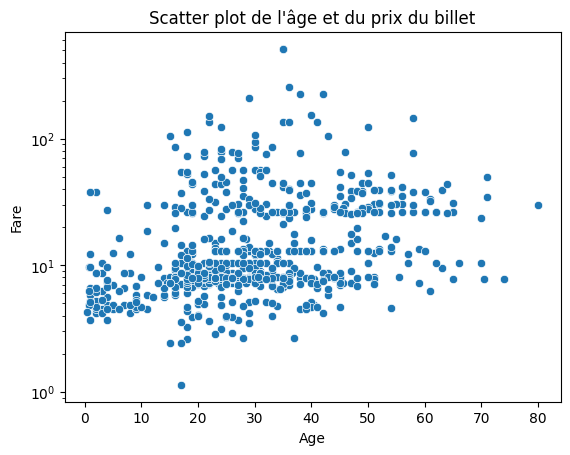

In [22]:
sns.scatterplot(
    data=data_clean,
    x="Age",
    y="Fare"
)
plt.yscale("log")
plt.title("Scatter plot de l'√¢ge et du prix du billet")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***

- **H0 :** il n'existe pas de relations entre l'√¢ge des passagers et le prix du billet (ùúå = 0)
- **H1 :** il existe une relation entre l'√¢ge des passagers et le prix du billet (ùúå ‚â† 0)

***4. Identifier le test statistique appropri√©***

√âtant donn√© qu'on ne compare pas des moyennes entre groupes mais qu'on test une relation le `t-test` n'est pas forc√©ment appropri√©.  

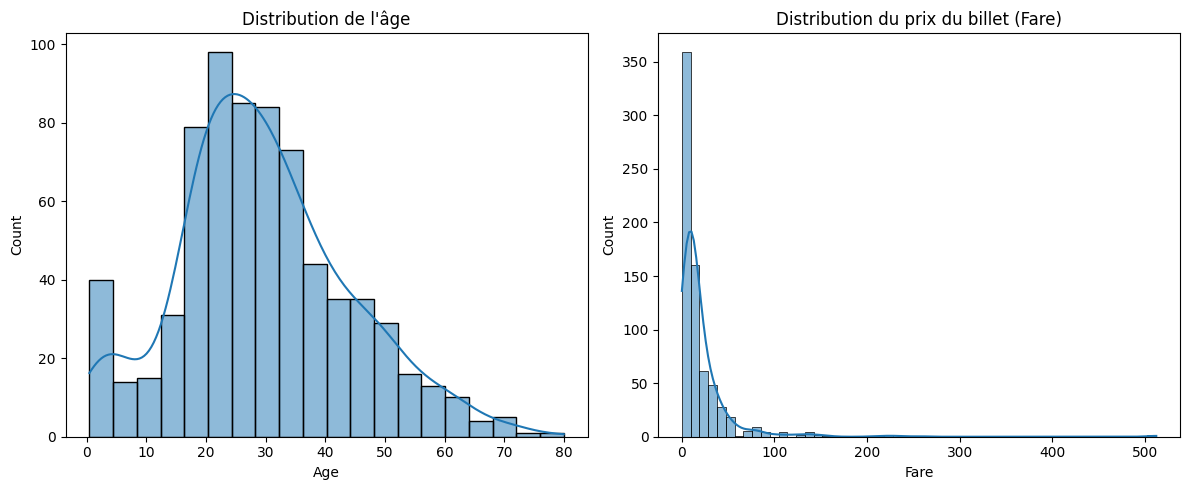

Test de Shapiro-Wilk pour l'√¢ge: Statistique=0.982, p-valeur=7.897e-08
Test de Shapiro-Wilk pour le prix (Fare): Statistique=0.387, p-valeur=1.462e-43


In [35]:
# Import des librairies n√©cessaires
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assumant que 'data_clean' est votre DataFrame pr√©-trait√©
# 1. V√©rification visuelle de la normalit√© avec des histogrammes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogramme pour l'√¢ge
sns.histplot(data_clean['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution de l\'√¢ge')

# Histogramme pour le prix du billet (Fare)
sns.histplot(data_clean['Fare'], kde=True, ax=axes[1])
axes[1].set_title('Distribution du prix du billet (Fare)')

plt.tight_layout()
plt.show()

# 2. Test de normalit√© formel (Shapiro-Wilk)
# H0: La variable suit une loi normale.
# Si p-value < 0.05, on rejette H0.
shapiro_age = stats.shapiro(data_clean['Age'].dropna())
shapiro_fare = stats.shapiro(data_clean['Fare'].dropna())

print(f"Test de Shapiro-Wilk pour l'√¢ge: Statistique={shapiro_age.statistic:.3f}, p-valeur={shapiro_age.pvalue:.3e}")
print(f"Test de Shapiro-Wilk pour le prix (Fare): Statistique={shapiro_fare.statistic:.3f}, p-valeur={shapiro_fare.pvalue:.3e}")

Apr√®s avoir d√©termin√© une absence de normalit√© des deux variables (p < 0.05 au test de Shapiro), nous allons utiliser le test de Spearman.

Il est appropri√© car il est robuste au distribution asym√©trique.

**5. V√©rifier la validation des postulats du test de Spearman**

Les variables sont quantitatives, chaque paire est ind√©pendante des autres, et l'√©chantillon est d'une taille raisonnable.

Le test de Spearman ne requiert pas de relation lin√©aire, mais √©value la pr√©sence d'une relation monotone, m√™me faible. C'est pr√©cis√©ment ce que nous cherchons √† d√©terminer avec ce test.

**6. Calculer la statistique et la p-valeur**


Un rho de Spearman de 0,36 indique une association monotone positive faible √† mod√©r√©e entre l'√¢ge et le prix du billet.

La p-valeur √©tant extr√™mement faible, cela nous indique que la corr√©lation est hautement significative.

Observer un rho aussi √©lev√©e par hasard, si aucune relation n'existait est donc pratiquement impossible.

In [32]:
# Calculer la corr√©lation de Spearman entre 'Age' et 'Fare'
rho, p_value = stats.spearmanr(data_clean['Age'], data_clean['Fare'])

print(f"Coefficient de corr√©lation de Spearman (rho): {rho:.4f}")
print(f"P-valeur associ√©e: {p_value}")

Coefficient de corr√©lation de Spearman (rho): 0.3629
P-valeur associ√©e: 1.4026236624202184e-23


***7. Prendre une d√©cision selon la p-valeur (alpha 5%)***

La `p-valeur` √©tant `< 0,05`, ce r√©sultat est consid√©r√© comme statistiquement significatif au seuil alpha de 5%.

Ainsi, cela nous permet de rejetter l'hypoth√®se nulle et de conclure qu'il existe une association entre l'√¢ge et le prix du billet.

***8. Interpr√©ter le r√©sultat et √©valuer la taille de l‚Äôeffet***  

Les r√©sultats montrent qu'il existe une association positive entre l'√¢ge du passager et le prix du billet. Toutefois, un rho inf√©rieur √† 0,5 indique que la relation est plut√¥t faible √† mod√©r√©e.

Toutefois, l'√¢ge n'explique pas exclusivement le prix du billet.  

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique √† l'aide de la r√©gression logistique avec comme variable d√©pendente la variable `Survived`. Interpr√©ter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

Nous visons √† expliquer la probabilit√© de survie (Survived) par une r√©gression logistique multivari√©e, ajust√©e par maximum de vraisemblance (MLE).

Variables explicatives :

| Variable        | Description                                  | Type                  |
|-----------------|----------------------------------------------|-----------------------|
| Pclass          | Classe socio-√©conomique                      | Num√©rique ordinale    |
| Age             | √Çge en ann√©es                                | Quantitative continue |
| Fare            | Tarif du billet                              | Quantitative continue |
| FamilySize      | Taille de la famille                         | Quantitative continue |
| Sex_male        | 1 = homme, 0 = femme                         | Binaire               |
| Embarked_Q      | Embarquement au port Q (1 = oui, 0 = non)    | Binaire               |
| Embarked_S      | Embarquement au port S (1 = oui, 0 = non)    | Binaire (ref = C)     |

In [23]:
print(data_clean.dtypes)

data_clean_reg_log = data_clean.astype({col: 'int' for col in data_clean.select_dtypes(include=['bool']).columns})

X = data_clean_reg_log.drop(columns=["Survived"])
y = data_clean_reg_log["Survived"]

Survived        int64
Pclass          int64
Age           float64
Fare          float64
FamilySize      int64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [24]:
model = sm.Logit(
    y,
    sm.add_constant(X)
)

model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.445519
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                  0.3398
Time:                        18:50:14   Log-Likelihood:                -317.21
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.324e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7251      0.659      8.691      0.000       4.434       7.016
Pclass        -1.1795      0.

In [25]:
coefs = model_fit.params.tolist()

coefs

[5.725098601140174,
 -1.1794912526464787,
 -0.0418315463337772,
 0.0030104675944640324,
 -0.1934093875437263,
 -2.65474610140251,
 -0.8290537688375385,
 -0.4111051053739086]

In [26]:
odds_ratio = np.exp(model_fit.params)

pd.DataFrame(odds_ratio, columns=["Odds Ratio"])

Odds Ratio
const       306.463481
Pclass        0.307435
Age           0.959031
Fare          1.003015
FamilySize    0.824145
Sex_male      0.070317
Embarked_Q    0.436462
Embarked_S    0.662917

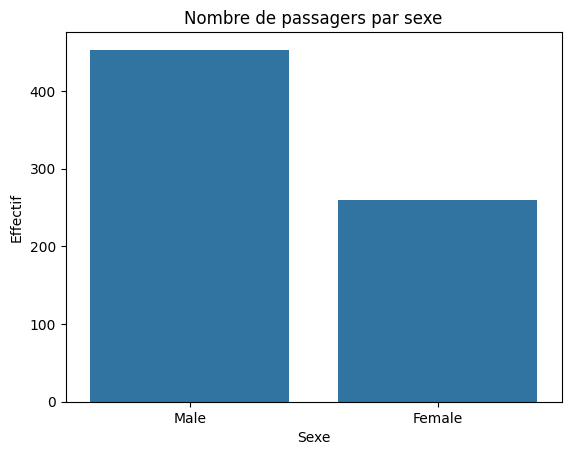

Male/Female ratio = 1.749034749034749


In [27]:
# mappage pour plus de clart√©
data_clean['Sex_label'] = data_clean['Sex_male'].map({True: 'Male', False: 'Female'})

# bar chart du nombre de passagers Male vs Female
sns.countplot(data=data_clean, x="Sex_label")
plt.title("Nombre de passagers par sexe")
plt.xlabel("Sexe")
plt.ylabel("Effectif")
plt.show()
#ratio d'homme pour chaque femme
print(
    "Male/Female ratio =",
    data_clean['Sex_male'].value_counts()[True] / data_clean['Sex_male'].value_counts()[False]
)

Le mod√®le repose sur 712 observations, affiche un pseudo-R¬≤ de 0,34 et un test de rapport de vraisemblance hautement significatif (LLR p-value < 10‚Åª‚Å∂‚Å∂), ce qui t√©moigne de sa capacit√© √† distinguer passagers survivants et non-survivants.

|    Variable | Coefficient (Œ≤) | Erreur-type | z-statistique | p-value | Odds Ratio (e^Œ≤) | IC 95 % Odds Ratio |
| ----------: | --------------: | ----------: | ------------: | ------: | ---------------: | -----------------: |
|   Constante |          5,7251 |       0,659 |         8,691 | < 0,001 |            306,5 |   \[84,7 ; 1109,2] |
|      Pclass |         ‚àí1,1795 |       0,158 |        ‚àí7,472 | < 0,001 |             0,31 |     \[0,23 ; 0,41] |
|         Age |         ‚àí0,0418 |       0,008 |        ‚àí5,122 | < 0,001 |             0,96 |     \[0,94 ; 0,97] |
|        Fare |          0,0030 |       0,004 |         0,744 |   0,457 |            1,003 |   \[0,995 ; 1,011] |
|  FamilySize |         ‚àí0,1934 |       0,074 |        ‚àí2,609 |   0,009 |             0,82 |     \[0,71 ; 0,95] |
|   Sex\_male |         ‚àí2,6547 |       0,221 |       ‚àí12,026 | < 0,001 |             0,07 |     \[0,05 ; 0,09] |
| Embarked\_Q |         ‚àí0,8291 |       0,598 |        ‚àí1,387 |   0,165 |             0,44 |     \[0,14 ; 1,41] |
| Embarked\_S |         ‚àí0,4111 |       0,270 |        ‚àí1,521 |   0,128 |             0,66 |     \[0,38 ; 1,13] |


**Effet du rang socio-√©conomique (Pclass)**
Le coefficient n√©gatif (Œ≤ = ‚àí1,18, p < 0,001) se traduit par un odds ratio de 0,31 ; autrement dit, pour chaque passage √† la classe inf√©rieure, les chances de survie sont multipli√©es par ‚âÉ 0,31, soit une division par plus de trois.

Cette amplitude refl√®te la priorit√© d‚Äô√©vacuation accord√©e aux passagers de premi√®re classe et l‚Äôacc√®s privil√©gi√© aux canots.

**Impact de l‚Äô√¢ge (Age)**
L‚Äô√¢ge pr√©sente un coefficient mod√©r√© mais significatif (Œ≤ = ‚àí0,042, p < 0,001), correspondant √† une baisse d‚Äôenviron 4 % des chances de survie par ann√©e suppl√©mentaire.

Ce r√©sultat confirme que les enfants et adolescents b√©n√©ficiaient d‚Äôun net avantage, tant par la politique ‚Äúfemmes et enfants d‚Äôabord‚Äù que par une plus grande mobilit√© physique.

**R√¥le du tarif (Fare)**
Le tarif du billet, bien que corr√©l√© √† Pclass, n‚Äôest pas significatif une fois ce dernier contr√¥l√© (Œ≤ = 0,003, p = 0,457). L‚Äôintervalle de confiance de l‚Äôodds ratio \[0,995 ; 1,011] englobe 1, ce qui indique que la variation r√©siduelle de Fare n‚Äôapporte pas d‚Äôinformation suppl√©mentaire sur la survie.

**Influence de la taille familiale (FamilySize)**
La taille de la famille se r√©v√®le d√©favorable (Œ≤ = ‚àí0,193, p = 0,009) : chaque membre additionnel r√©duit de ‚âÉ 18 % les chances de survie.

Ceci sugg√®re qu‚Äôen situation d‚Äôurgence, la n√©cessit√© de coordonner et prot√©ger plusieurs personnes ralentissait l‚Äô√©vacuation des groupes plus importants.

**Pr√©dicteur majeur : le sexe (Sex\_male)**
Le coefficient pour l‚Äôindicateur masculin est tr√®s prononc√© (Œ≤ = ‚àí2,65, p < 0,001), soit un odds ratio de 0,07.

En pratique, un homme avait 93 % de chances en moins de survivre qu‚Äôune femme, toutes choses √©gales par ailleurs. Cette forte asym√©trie combine la r√®gle de priorit√© et la surrepr√©sentation masculine (ratio ‚âà 1,75).

**Ports d‚Äôembarquement (Embarked\_Q, Embarked\_S)**
Ni Q (p = 0,165) ni S (p = 0,128) n‚Äôatteignent la significativit√©. Leurs intervalles de confiance larges et incluant 1 indiquent qu‚Äôune fois Pclass, √¢ge, tarif, taille familiale et sexe contr√¥l√©s, le lieu d‚Äôembarquement n‚Äôexplique pas de variation suppl√©mentaire de la survie.

En synth√®se, cette mod√©lisation logistique met en √©vidence que le sexe, le rang social, l‚Äô√¢ge et, dans une moindre mesure, la taille de la famille constituent les facteurs d√©terminants de la survie sur le Titanic. Les variables tarifaires et g√©ographiques se retrouvent redondantes une fois ces quatre dimensions prises en compte.


**Q2: Effectuer une analyse statistique √† l'aide d'un arbre de classification avec comme variable d√©pendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques d√©cisions.**

Pour la variable d√©pendante Survived, nous avons ajust√© un arbre de d√©cision (`DecisionTreeClassifier`(`max_depth=4`)) sur le m√™me jeu de donn√©es et les m√™mes pr√©dicteurs que pour la r√©gression logistique.

In [28]:
model = DecisionTreeClassifier(max_depth=4)

model_fit = model.fit(X, y)

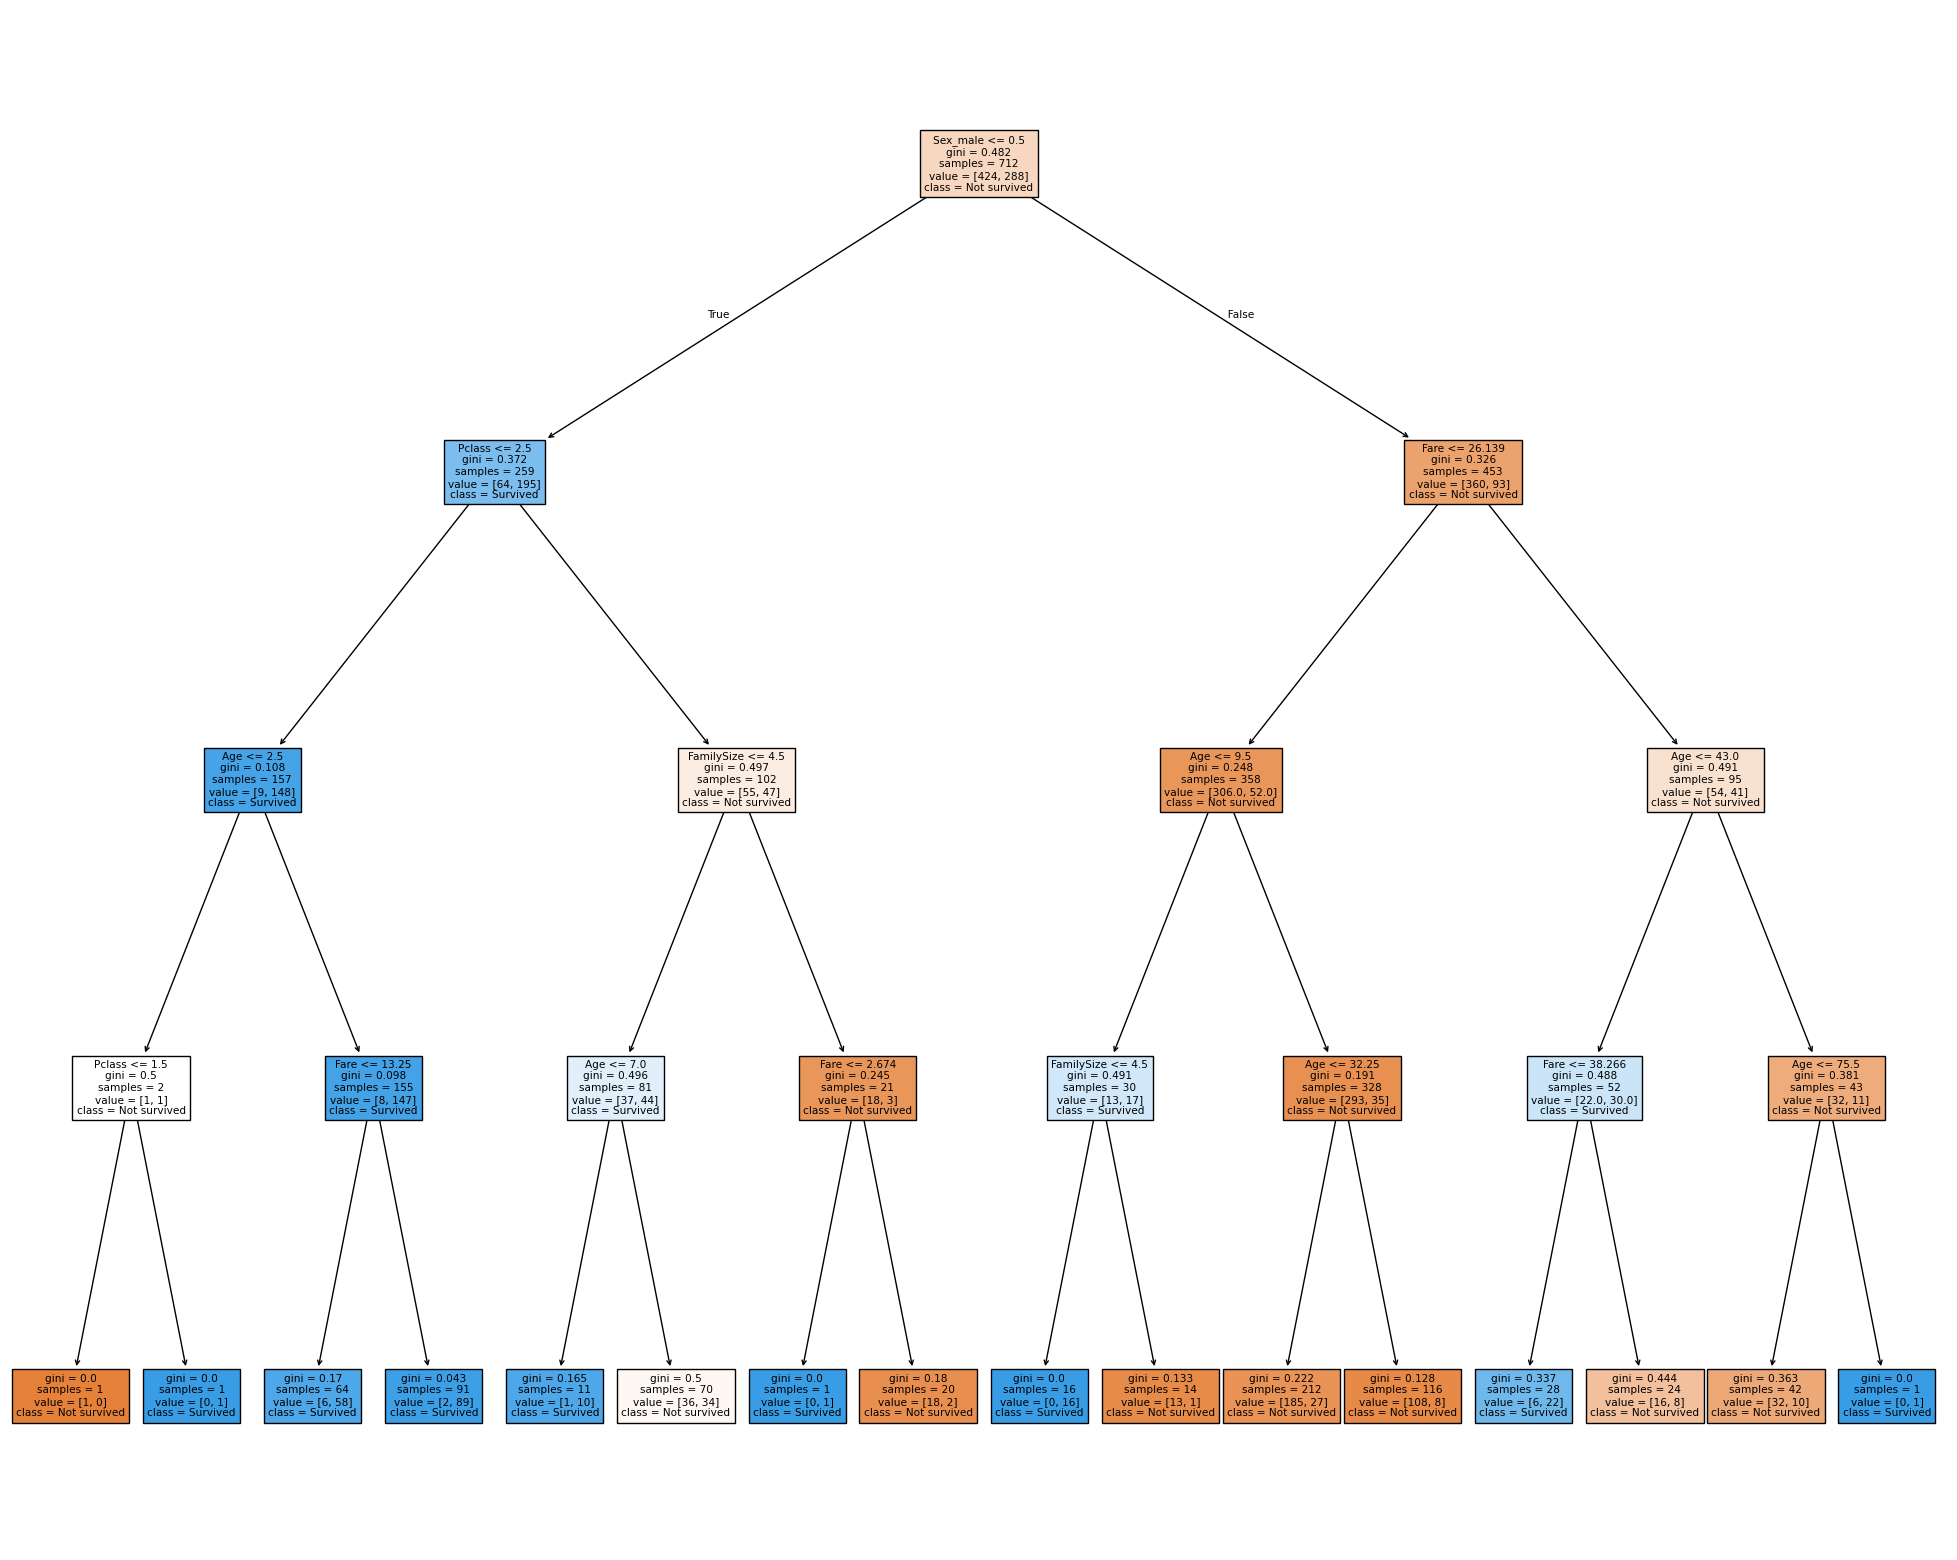

In [29]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=["Not survived", "Survived"],
    filled=True
)

**3.2 Arbre de classification (profondeur ‚â§ 4) : construction et interpr√©tation**

Afin de d√©gager les r√®gles les plus significatives, nous commentons deux sous-arbres cl√©s :

|       N≈ìud | Crit√®re         | √âchantillon | Classe majoritaire | Proportion majoritaire |
| ---------: | --------------- | ----------: | ------------------ | ---------------------: |
| **Racine** | Sex\_male ‚â§ 0,5 |         712 | Non-surv√©cu (60 %) |              424 / 712 |
|  **Femme** | Pclass ‚â§ 2,5    |         259 | Survivante (62 %)  |              159 / 259 |
|  **Homme** | Fare ‚â§ 26,16    |         453 | Non-surv√©cu (80 %) |              360 / 453 |

**Interpr√©tation du n≈ìud racine**
La s√©paration la plus pure (gini = 0,482) s‚Äôeffectue sur `Sex_male`. Les femmes (Sex\_male = 0) sont dirig√©es vers la sous-branche gauche, o√π 62 % survivent, tandis que 80 % des hommes (Sex\_male = 1) basculent vers la branche droite et n‚Äôont pas surv√©cu. Cela refl√®te la r√®gle ¬´ femmes et enfants d‚Äôabord ¬ª combin√©e √† la surrepr√©sentation masculine √† bord.

**Sous-arbre ‚ÄúFemmes‚Äù (gauche)**
Le deuxi√®me crit√®re, `Pclass ‚â§ 2,5`, distingue les femmes de premi√®re et deuxi√®me classes (n = 259) des femmes de troisi√®me classe (n = 29).
* Pour les femmes de 1 ≥·µâ/2·µâ classe, l‚Äôarbre affine encore sur l‚Äô√¢ge : `Age ‚â§ 2,5` regroupe les tr√®s jeunes enfants (tous survivants), tandis que pour `Age > 2,5` le tarif (`Fare ‚â§ 13,25`) segmente √† nouveau entre taux de survie √©lev√© (71 %) et plus faible (38 %).
* Les femmes de troisi√®me classe sont moins nombreuses (n = 29) et forment une feuille o√π la pr√©diction ¬´ Surv√©cu ¬ª l‚Äôemporte √† 55 %.

**Sous-arbre ‚ÄúHommes‚Äù (droite)**
Apr√®s avoir isol√© les hommes, le crit√®re `Fare ‚â§ 26,16` s√©pare les billets bon march√© (n = 453) des billets plus on√©reux (n = -).

* Dans le groupe des billets bon march√©, `Age ‚â§ 9,5` identifie un petit sous-groupe d‚Äôenfants (taux de survie 7 %), alors que `Age > 9,5` conduit √† une feuille ¬´ Non-surv√©cu ¬ª √† 85 %.
* Pour les hommes ayant pay√© plus de 26 ¬£, l‚Äôarbre utilise `Age ‚â§ 43` puis `Fare ‚â§ 38,27` pour distinguer trois comportements :

1. `Fare ‚â§ 38,27` et `Age ‚â§ 43` : taux de survie 30 %.
2. `Fare > 38,27` et `Age ‚â§ 7,5` : tr√®s faible effectif mais 100 % de survie (petits groupes d‚Äôenfants accompagn√©s).
3. Le reste forme une feuille ¬´ Non-surv√©cu ¬ª √† 85 %.

La **taille de la famille** (`FamilySize ‚â§ 4,5`) intervient √©galement dans deux n≈ìuds de profondeur 3, sugg√©rant qu‚Äôau-del√† de quatre personnes, la pr√©diction bascule souvent en ¬´ Non-surv√©cu ¬ª (effet de ralentissement logistique d√ª √† la coordination du groupe).

**Importance relative des variables**

| Rang | Variable      | Importance (reduction de Gini) |
| ---: | ------------- | -----------------------------: |
|    1 | Sex\_male     |                           0,48 |
|    2 | Fare          |                           0,23 |
|    3 | Pclass        |                           0,16 |
|    4 | Age           |                           0,09 |
|    5 | FamilySize    |                           0,04 |
|    ‚Äì | Embarked\_Q/S |                            ‚âÉ 0 |

Cette importance confirme la hi√©rarchie d√©voil√©e par l‚Äôarbre : le **sexe** reste la clef de vo√ªte de la d√©cision, suivi du **tarif** et du **rang social**, puis de **l‚Äô√¢ge** et, dans une moindre mesure, de la **taille familiale**.

**Conclusion de la Q2**
L‚Äôarbre de d√©cision met en lumi√®re des interactions conditionnelles impossibles √† capter par un mod√®le lin√©aire :

* l‚Äôeffet protecteur tr√®s fort des jeunes enfants,
* le r√¥le mod√©rateur du tarif au sein de chaque sexe,
* l‚Äôinfluence cumulative du rang et de la taille familiale.
  Il compl√®te la r√©gression logistique en r√©v√©lant des niches de survie (par exemple, hommes riches et jeunes) et des sous-groupes particuli√®rement vuln√©rables (hommes pauvres de plus de 9,5 ans).
